In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

$Data\;collection\;and\;Processing\;$<br><br>
**Data set: Kaggle**

In [22]:
heart_data=pd.read_csv('models/Heart_Disease_Prediction.csv')

In [23]:
heart_data[:5]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [24]:
heart_data.shape

(270, 14)

 *only 270 tuples , which is a very small dataset*

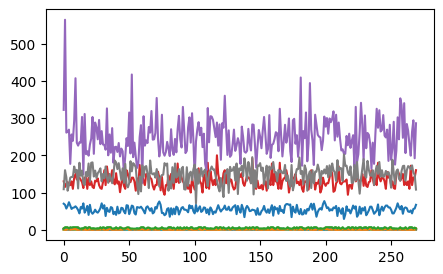

In [25]:
import matplotlib.pyplot as pl
pl.figure(figsize=(5,3))
pl.plot(heart_data.iloc[:, :-1])  # Exclude the last column
pl.show()

---
*checking for missing data*

In [26]:
missing_data_count=pd.isnull(heart_data).sum()
missing_data_count

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

___

*statistical aspects of data*

In [27]:
heart_data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [28]:
heart_data['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

---

$splitting \;variables \;(independent \;and\;depents)$

only one target variable we have in the dataset ie Heart Disease

In [29]:
x = heart_data.drop(columns='Heart Disease',axis=1)
y = heart_data['Heart Disease']

In [30]:
x

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [31]:
y

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object

---
$Splitting \;data \;for\;training\;and\;testing$

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [33]:
x_train.shape,x_test.shape

((216, 13), (54, 13))

---
$Model\;Training\;$
<br>
$Model\;:\;Logistic \;Regression$

In [34]:
model=LogisticRegression()

In [35]:
model.fit(x_train,y_train)

C:\Users\91888\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

---
$Accuracy\; of\; the \;model$

- lets first test the model on the data which is trained on

In [36]:
x_train_predict=model.predict(x_train)

test the predicted values with actual trained target ie y_train

In [37]:
training_data_accuracy = accuracy_score(x_train_predict,y_train)
training_data_accuracy

0.8796296296296297

In [46]:
y_predict=model.predict(x_test)

In [47]:
testing_data_accuracy = accuracy_score(y_test,y_predict)
testing_data_accuracy

0.8333333333333334

---
$confusion\;matrix$

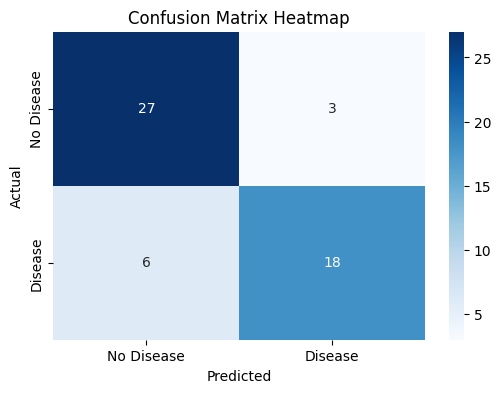

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


---
$Save\;the\;Model$

In [53]:
import joblib  

# Save the model
joblib.dump(model, 'heart_disease_model.pkl')

print("Model saved successfully!")

Model saved successfully!


---
$Load\;the\;Saved\;Model\; to \; prdiction$

In [55]:
prediction_model = joblib.load('heart_disease_model.pkl')

---
 **Example: Load x_test from a CSV file (if saved before)** <br>
 **x_test = pd.read_csv('x_test.csv')**

In [57]:
# If you want to manually create an input, use:
test_data = pd.DataFrame({
    'Age': [55],  # Example values
    'Sex': [1],  # 1 = Male, 0 = Female
    'Chest pain type': [2],  # Different types (0-3)
    'BP': [140],
    'Cholesterol': [250],
    'FBS over 120': [0],  # 0 = No, 1 = Yes
    'EKG results': [1],  # ECG results category
    'Max HR': [150],  # Maximum heart rate
    'Exercise angina': [0],  # 0 = No, 1 = Yes
    'ST depression': [1.2],  # ST depression induced by exercise
    'Slope of ST': [2],  # Slope of the peak exercise ST segment
    'Number of vessels fluro': [1],  # Number of major vessels
    'Thallium': [3]  # Thallium stress test result
})

In [59]:
predict = prediction_model.predict(test_data)
print(predict)

['Absence']


---
$we'll\;finetune\;the\;model\;later\;and\;try\;on\;different\;algorithms$